# Linear regression example

This is a simple Jupyter demo. We are going to take two world bank indicators and show visually their correlation using a scatter plot and a regression line over it. These indicators has been chosen by the reading of this document: https://wiki.cs.umd.edu/cmsc734_f13/index.php?title=Correlations_and_Anomalies_in_World_Bank_Indicator_Data. Base code has been taken from http://pandas.pydata.org/pandas-docs/stable/remote_data.html#remote-data-wb and modified to fit the example.

## The indicators

We are going to download, clean and visualize these indicators

| World Bank Code     | Description                                                 |
|---------------------|-------------------------------------------------------------|
|   SH.STA.ACSN       | Improved sanitation facilities (% of population with access)|
|   SE.PRM.CMPT.FE.ZS | Primary completion rate, female (%)                         |


## The formula

To draw the regression line we are going to use a simple line function

$$y = \beta_0 + \beta_1x$$

The intercept $(\beta_0)$ and the slope $(\beta_1)$ are obtained using the **_ordinary least squares_** method.

Let's see the code

In [1]:
from pandas_datareader import wb

ind = ['SH.STA.ACSN', 'SE.PRM.CMPT.FE.ZS']
dat = wb.download(indicator=ind, country='all', start=2013, end=2013).dropna()
dat.columns = ['sanitation', 'completion']
print dat

                                                     sanitation  completion
country                                        year                        
Arab World                                     2013   82.772362    84.42834
Caribbean small states                         2013   85.863751    92.92513
Central Europe and the Baltics                 2013   92.601321    96.83580
East Asia & Pacific (all income levels)        2013   75.501458   105.54893
Euro area                                      2013   98.920460    97.65422
Europe & Central Asia (all income levels)      2013   92.912935    98.49197
Europe & Central Asia (developing only)        2013   93.238776    99.10096
European Union                                 2013   97.775585    97.41499
Fragile and conflict affected situations       2013   42.827757    63.59075
Heavily indebted poor countries (HIPC)         2013   26.370373    62.10583
High income                                    2013   96.258407    98.94553
High income:

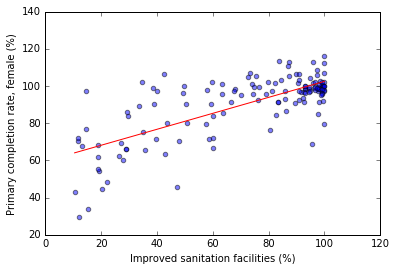

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

plt.figure(1)

sanitation = dat['sanitation']
completion = dat['completion']
mod = smf.ols("completion ~ sanitation", dat).fit()
(intercept, slope) = mod.params
x = np.array([min(sanitation), max(sanitation)])
y = intercept + slope * x
plt.plot(x, y, '-r')
plt.scatter(sanitation, completion, alpha=0.5)
plt.xlabel("Improved sanitation facilities (%)")
plt.ylabel("Primary completion rate, female (%)")
plt.show()